In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

# reflect the tables
Base = automap_base()
Base.prepare(autoload_with = engine, reflect = True)

C:\Users\lunar01\AppData\Local\Temp\ipykernel_27884\2963928987.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(autoload_with = engine, reflect = True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [20]:
session = Session(engine)

conn = engine.connect()

In [9]:
# Create our session (link) from Python to the DB
data_measurement = pd.read_sql("SELECT * FROM measurement", engine)
data_station = pd.read_sql("SELECT * FROM station", engine)

# Check data load for measurements
data_measurement.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [10]:
# Check data load for stations
data_station.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
most_recent_date = data_measurement['date'].max()
most_recent_date

'2017-08-23'

2016-08-23


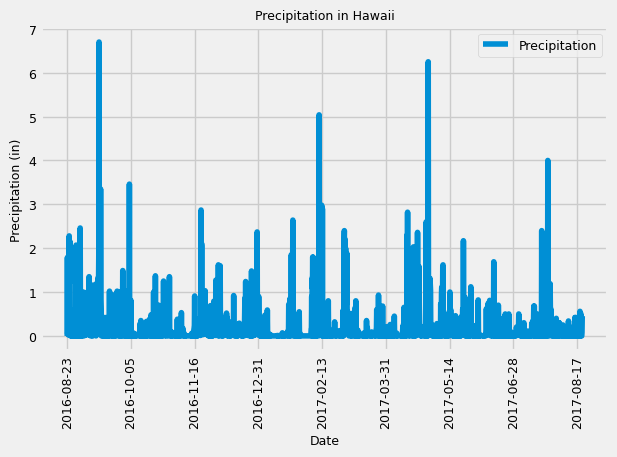

In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
date_range = (dt.date(2017,8,23)) - (dt.timedelta(days=365))
print(date_range)

# Perform a query to retrieve the data and precipitation scores
prcp_score = session.query(measurement.date, measurement.prcp).filter(measurement.date >= date_range)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_score_df = pd.DataFrame(prcp_score, columns = ['Date', 'Precipitation'])

# Sort the dataframe by date
prcp_score_df = prcp_score_df.sort_values('Date')
prcp_score_df = prcp_score_df.dropna()

# Use Pandas Plotting with Matplotlib to plot the data
prcp_score_df.plot(x = 'Date', y = 'Precipitation', rot = 90)

plt.title("Precipitation in Hawaii", fontsize = 9)
plt.xlabel("Date", fontsize = 9)
plt.ylabel("Precipitation (in)", fontsize = 9)
plt.xticks(rotation = 90, fontsize = 9)
plt.yticks(fontsize = 9)
plt.tight_layout()
plt.legend(["Precipitation"], loc = "upper right", fontsize = 9)
plt.show()


In [28]:
# Use Pandas to calculate the summary statistics for the precipitation data
data_measurement.describe()

,id,prcp,tobs
count,19550.000000,18103.000000,19550.000000
mean,9775.500000,0.160644,73.097954
std,5643.743217,0.468746,4.523527
min,1.000000,0.000000,53.000000
25%,4888.250000,0.000000,70.000000
50%,9775.500000,0.010000,73.000000
75%,14662.750000,0.110000,76.000000
max,19550.000000,11.530000,87.000000


# Exploratory Station Analysis

In [29]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(station.station).count()
print(f'Total number of stations: {total_stations}')

Total number of stations: 9


In [35]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
activity_stations = session.query(measurement.station, 
                                     func.count(measurement.station)).group_by(
                                         measurement.station).order_by(
                                         func.count(measurement.station).desc()).all()

activity_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [45]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
## Get highest, lowest and average temperature for the most active station = USC00519281
top_station = session.query(measurement.station, measurement.tobs).filter(
    measurement.station == 'USC00519281').all()

top_station[0]

top_station = pd.DataFrame(top_station)
top_station.head()

temps = top_station['tobs']
print(f'Highest: {(temps).max()}, Lowest: {(temps.min())}, Average: {(temps).mean()}')

Highest: 85.0, Lowest: 54.0, Average: 71.66378066378067


In [47]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last_12_months_temp = session.query(measurement.tobs, measurement.date).filter(measurement.date >= date_range).filter(measurement.station == 'USC00519281')

#Check data 
last_12_months_temp[0]


(77.0, '2016-08-23')

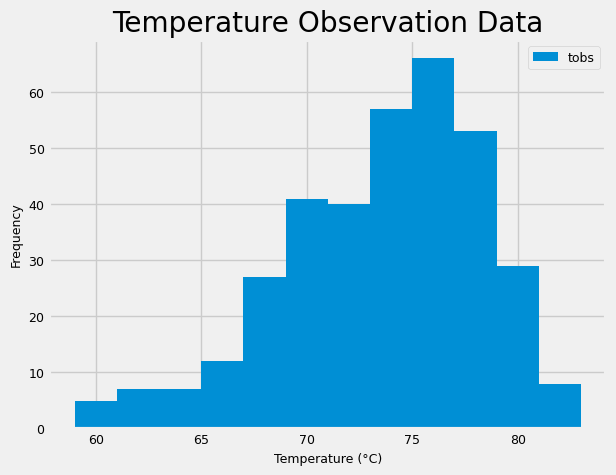

In [51]:
# Plot the results as a histogram with 12 bins

last_12_months_temp_df = pd.DataFrame(last_12_months_temp)
last_12_months_temp_df.head()

plt.hist(last_12_months_temp_df['tobs'], bins = 12)
plt.xlabel("Temperature (°C)", fontsize = 9)
plt.xticks(fontsize = 9)
plt.ylabel("Frequency", fontsize = 9)
plt.yticks(fontsize = 9)
plt.title("Temperature Observation Data")
plt.legend(["tobs"], loc = "upper right", fontsize = 9)
plt.show()



# Close Session

In [52]:
# Close Session
session.close()